# **Salary, Spent Clustering Using Hierarchial Clustering**

## **Importing Libraries**

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

## **Load dataset into Notebook**

In [29]:
from google.colab import files
uploaded = files.upload()

Saving salarySpendDataset1.csv to salarySpendDataset1 (2).csv


## **Load Dataset**

In [30]:
dataset = pd.read_csv('salarySpendDataset1.csv')
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## **Dataset Summarization**

In [31]:
print(dataset.shape)
print(dataset.head(5))
print(dataset.describe())

(200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
3           4  Female   23                  16              77
4           5  Female   31                  17              40
       CustomerID         Age  Annual Income (k$)  Spending Score
count  200.000000  200.000000          200.000000      200.000000
mean   100.500000   38.850000           60.560000       50.200000
std     57.879185   13.969007           26.264721       25.823522
min      1.000000   18.000000           15.000000        1.000000
25%     50.750000   28.750000           41.500000       34.750000
50%    100.500000   36.000000           61.500000       50.000000
75%    150.250000   49.000000           78.000000       73.000000
max    200.000000   70.000000          137.000000       99.000000


## **Label Encoding for Object Datatypes**

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Gender'] = le.fit_transform(dataset['Gender'])
dataset.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## **Dendrogram Visualization**

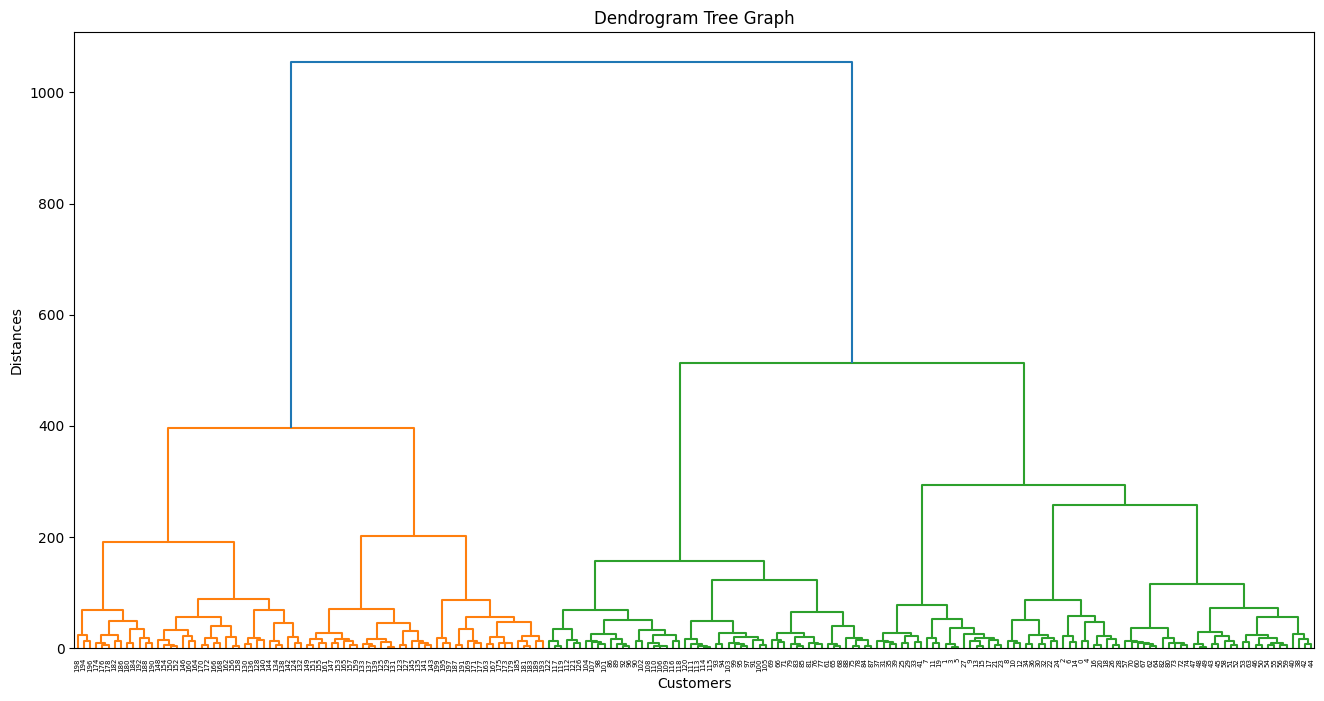

In [33]:
import scipy.cluster.hierarchy as clus

plt.figure(1, figsize = (16,8))
dendrogram = clus.dendrogram(clus.linkage(dataset, method = 'ward'))

plt.title('Dendrogram Tree Graph')
plt.xlabel('Customers')
plt.ylabel('Distances')
plt.show()

## **Model Training and Clustering**

In [34]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'average')
y_means = model.fit_predict(dataset)
print(y_means)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


## **Visualizing Hierarchial Clustering with Clusters = 5**

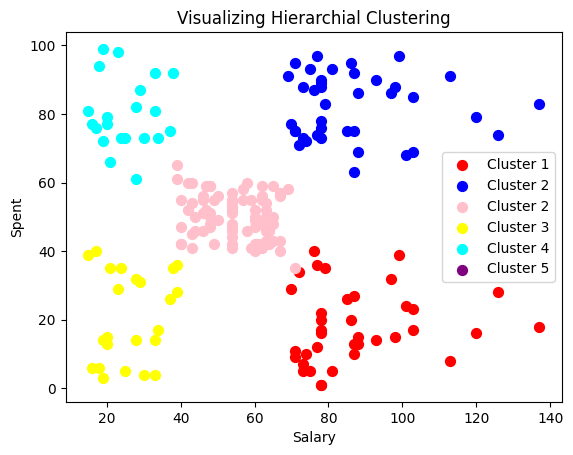

In [35]:
x = dataset.iloc[:, [3,4]].values
plt.scatter(x[y_means ==0, 0], x[y_means ==0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_means ==1, 0], x[y_means ==1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_means ==2, 0], x[y_means ==2, 1], s = 50, c = 'pink', label = 'Cluster 2')
plt.scatter(x[y_means ==3, 0], x[y_means ==3, 1], s = 50, c = 'yellow', label = 'Cluster 3')
plt.scatter(x[y_means ==4, 0], x[y_means ==4, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_means ==5, 0], x[y_means ==5, 1], s = 50, c = 'purple', label = 'Cluster 5')
plt.title('Visualizing Hierarchial Clustering')
plt.xlabel('Salary')
plt.ylabel('Spent')
plt.legend()
plt.show()